In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as CM

from sklearn import svm

from sklearn import metrics

#آدرس خودتون رو بدید با همین فرمت
proteinuria = pd.read_excel('C:\\Users\\Hadiiii\\Google Drive\\@Projects\\2-Doing\\Torabi Thesis\\Modeling\\proteinuria2.xlsx')

proteinuria.head()

,gender,age,bloodPresh,BMI,etiologyCKD,Hb,Alb,Cr,eGFR,CKD_stage,...,eGFR_18M,eGFR_24M,eGFR_30M,eGFR_36M,eGFR_lastvisit,obDuration,GFR_reached,RRT,RRT_duration,CKD_prog
0,2,74,120.0,23.137669,nephros,12.0,4.0,1.20,34.146986,3,...,24.682189,21.614854,20.420524,18.495328,18.495328,37,0,0,37,0
1,1,39,121.0,31.708284,glomer,15.0,4.7,1.31,50.451187,3,...,NaN,NaN,NaN,NaN,50.451187,1,0,0,1,3
2,1,74,143.0,24.554564,nephros,10.9,3.8,4.95,9.804696,5,...,NaN,NaN,NaN,NaN,5.578057,13,0,1,13,0
3,1,57,139.0,28.515625,nephros,15.9,4.8,0.84,73.570568,2,...,72.845992,71.908942,71.562914,67.225032,67.225032,37,0,0,37,0
4,1,32,154.0,24.582701,other,14.4,4.4,0.87,83.558305,2,...,68.856399,72.901926,69.749275,69.171408,69.171408,36,0,0,36,0


In [2]:
#ستون هایی که ماهیت کتگوریکال چندگانه دارند تبدیل به ستون های باینری می شوند
proteinuria2 = pd.get_dummies(proteinuria, columns=['etiologyCKD','CKD_stage',
                                                    'CKDcategory',
                                                    'dipproteinuria',
                                                   'UPCRcategory'])

In [3]:
proteinuria2.describe()

,gender,age,bloodPresh,BMI,Hb,Alb,Cr,eGFR,proteinuria,urinaryblood,...,CKDcategory_12.0,dipproteinuria_-1.0,dipproteinuria_0.0,dipproteinuria_1.0,dipproteinuria_2.0,dipproteinuria_3.0,dipproteinuria_4.0,UPCRcategory_1.0,UPCRcategory_2.0,UPCRcategory_3.0
count,1137.000000,1137.000000,1119.000000,1000.000000,1135.000000,1125.000000,1137.000000,1137.000000,1121.000000,1121.000000,...,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000
mean,1.303430,67.574318,139.785523,23.734674,11.938062,3.842693,2.270484,32.706353,0.632471,0.336307,...,0.151275,0.226913,0.135444,0.143360,0.216359,0.233949,0.029903,0.252419,0.151275,0.518909
std,0.459942,13.678140,22.462701,4.033303,2.293572,0.636339,1.717845,18.723688,0.482347,0.472656,...,0.358475,0.419020,0.342348,0.350594,0.411943,0.423526,0.170395,0.434591,0.358475,0.499862
min,1.000000,21.000000,66.000000,14.239943,5.900000,1.400000,0.510000,2.472772,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,61.000000,125.000000,21.027875,10.200000,3.500000,1.200000,17.491158,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,70.000000,138.000000,23.243851,12.000000,4.000000,1.740000,29.768705,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,77.000000,152.000000,25.769369,13.600000,4.300000,2.680000,44.981210,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,2.000000,94.000000,234.000000,44.158639,19.000000,5.200000,13.320000,89.981926,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
proteinuria2.isna().sum()

gender                    0
age                       0
bloodPresh               18
BMI                     137
Hb                        2
Alb                      12
Cr                        0
eGFR                      0
proteinuria              16
urinaryblood             16
UPCR                     88
hypertension              0
prevalenceCVD             0
diabetes                  0
useRAASi                  0
useCCB                    0
useDiuretics              0
eGFR_0M                   0
eGFR_6M                 201
eGFR12M                 331
eGFR_18M                425
eGFR_24M                479
eGFR_30M                551
eGFR_36M                615
eGFR_lastvisit            0
obDuration                0
GFR_reached               0
RRT                       0
RRT_duration              0
CKD_prog                  0
etiologyCKD_diabetic      0
etiologyCKD_glomer        0
etiologyCKD_nephros       0
etiologyCKD_other         0
CKD_stage_2               0
CKD_stage_3         

In [5]:
#Fill eGFR

ff = proteinuria2.columns.get_loc("eGFR_0M")

ll = proteinuria2.columns.get_loc("eGFR_lastvisit")
 
for i in range(len(proteinuria2)):
    xx = proteinuria2.iloc[i, ff:ll+1]
    if xx.isnull().any() == True:
        proteinuria2.iloc[i, ff:ll+1] = xx.interpolate(method ='linear', limit_direction ='backward')



In [6]:
#fill other columns with column average
proteinuria2 = proteinuria2.apply(lambda x: x.fillna(x.mean()),axis=0)
 

In [7]:
 proteinuria2.isna().sum()

gender                  0
age                     0
bloodPresh              0
BMI                     0
Hb                      0
Alb                     0
Cr                      0
eGFR                    0
proteinuria             0
urinaryblood            0
UPCR                    0
hypertension            0
prevalenceCVD           0
diabetes                0
useRAASi                0
useCCB                  0
useDiuretics            0
eGFR_0M                 0
eGFR_6M                 0
eGFR12M                 0
eGFR_18M                0
eGFR_24M                0
eGFR_30M                0
eGFR_36M                0
eGFR_lastvisit          0
obDuration              0
GFR_reached             0
RRT                     0
RRT_duration            0
CKD_prog                0
etiologyCKD_diabetic    0
etiologyCKD_glomer      0
etiologyCKD_nephros     0
etiologyCKD_other       0
CKD_stage_2             0
CKD_stage_3             0
CKD_stage_4             0
CKD_stage_5             0
CKDcategory_

In [8]:
proteinuria2 = proteinuria2.apply(pd.to_numeric) 


In [9]:
import GA
import pickle
import matplotlib.pyplot

 
data_inputs = proteinuria2.drop(['CKD_prog'], axis = 1).values
 
data_outputs = proteinuria2["CKD_prog"].values


num_samples = data_inputs.shape[0]
num_feature_elements = data_inputs.shape[1]

train_indices = np.arange(1, num_samples,2)
test_indices = np.arange(0, num_samples, 4)
print("Number of training samples: ", train_indices.shape[0])
print("Number of test samples: ", test_indices.shape[0])



"""
Genetic algorithm parameters:
    Population size
    Mating pool size
    Number of mutations
"""
sol_per_pop = 8 # Population size.
num_parents_mating = 4 # Number of parents inside the mating pool.
num_mutations = 3 # Number of elements to mutate.

# Defining the population shape.
pop_shape = (sol_per_pop, num_feature_elements)

# Creating the initial population.
new_population = np.random.randint(low=0, high=2, size=pop_shape)
print(new_population.shape)



best_outputs = []
num_generations = 100
for generation in range(num_generations):
    print("Generation : ", generation)
    # Measuring the fitness of each chromosome in the population.
    fitness = GA.cal_pop_fitness(new_population, data_inputs, data_outputs, train_indices, test_indices)

    best_outputs.append(np.max(fitness))
    # The best result in the current iteration.
    print("Best result : ", best_outputs[-1])

    # Selecting the best parents in the population for mating.
    parents = GA.select_mating_pool(new_population, fitness, num_parents_mating)

    # Generating next generation using crossover.
    offspring_crossover = GA.crossover(parents, offspring_size=(pop_shape[0]-parents.shape[0], num_feature_elements))

    # Adding some variations to the offspring using mutation.
    offspring_mutation = GA.mutation(offspring_crossover, num_mutations=num_mutations)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

# Getting the best solution after iterating finishing all generations.
# At first, the fitness is calculated for each solution in the final generation.
fitness = GA.cal_pop_fitness(new_population, data_inputs, data_outputs, train_indices, test_indices)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = np.where(fitness == np.max(fitness))[0]
best_match_idx = best_match_idx[0]

best_solution = new_population[best_match_idx, :]
best_solution_indices = np.where(best_solution == 1)[0]
best_solution_num_elements = best_solution_indices.shape[0]
best_solution_fitness = fitness[best_match_idx]

Number of training samples:  568
Number of test samples:  285
(8, 58)
Generation :  0
Best result :  0.7228070175438597
Generation :  1
Best result :  0.7228070175438597
Generation :  2
Best result :  0.7228070175438597
Generation :  3
Best result :  0.7228070175438597
Generation :  4
Best result :  0.7228070175438597
Generation :  5
Best result :  0.7228070175438597
Generation :  6
Best result :  0.7228070175438597
Generation :  7
Best result :  0.7228070175438597
Generation :  8
Best result :  0.7228070175438597
Generation :  9
Best result :  0.7228070175438597
Generation :  10
Best result :  0.7228070175438597
Generation :  11
Best result :  0.7228070175438597
Generation :  12
Best result :  0.7228070175438597
Generation :  13
Best result :  0.7228070175438597
Generation :  14
Best result :  0.7228070175438597
Generation :  15
Best result :  0.7228070175438597
Generation :  16
Best result :  0.7228070175438597
Generation :  17
Best result :  0.7228070175438597
Generation :  18
Best 

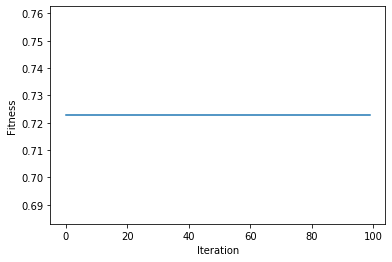

Selected indices :  [ 0  2  3  6  7  8  9 10 11 12 13 14 16 18 21 25 27 29 33 35 37 38 39 40
 41 42 43 46 47 49 53 54 57]


In [10]:
matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()
print("Selected indices : ", best_solution_indices)

In [11]:
best_solution_indices

array([ 0,  2,  3,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 18, 21, 25, 27,
       29, 33, 35, 37, 38, 39, 40, 41, 42, 43, 46, 47, 49, 53, 54, 57],
      dtype=int64)

In [12]:
X_Selected = proteinuria2.iloc[:,best_solution_indices]
 
Y_Selected = proteinuria2["CKD_prog"].values 

In [13]:

def get_error_rate(pred, Y):
    return (sum(pred != Y) / float(len(Y)))

def generic_clf(Y_train, X_train, Y_test, X_test, clf):
    clf.fit(X_train,Y_train)
    pred_train = clf.predict(X_train)
    pred_test = clf.predict(X_test)
    return get_error_rate(pred_train, Y_train), \
           get_error_rate(pred_test, Y_test), \
            pred_test






# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_Selected, Y_Selected, test_size=0.4,random_state=109) # 70% training and 30% test


In [14]:
#SVM
from sklearn import svm

SVM_clf = svm.SVC(kernel='linear', gamma=2)

er_SVM = generic_clf(y_train, X_train, y_test, X_test, SVM_clf)
er_train, er_test, Predd  = [er_SVM[0]], [er_SVM[1]],[er_SVM[2]]
print(er_train)
print(er_test)


print("Confusion Matrix:"'\n',CM(y_test, np.array(Predd).reshape(len(y_test),1)))

[0.0]
[0.0]
Confusion Matrix:
 [[311   0   0   0]
 [  0  28   0   0]
 [  0   0  27   0]
 [  0   0   0  89]]


In [15]:
#Logestic Regression
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

LR_clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')
er_LR = generic_clf(y_train, X_train, y_test, X_test, LR_clf)
er_train, er_test , Predd = [er_LR[0]], [er_LR[1]], [er_LR[2]]
print(er_train)
print(er_test)

print("Confusion Matrix:"'\n',CM(y_test, np.array(Predd).reshape(len(y_test),1)))

[0.06451612903225806]
[0.1076923076923077]
Confusion Matrix:
 [[311   0   0   0]
 [ 25   3   0   0]
 [  0   1   4  22]
 [  0   0   1  88]]


In [16]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()
er_gnb = generic_clf(y_train, X_train, y_test, X_test, gnb_clf)
er_train, er_test, predd = [er_gnb[0]], [er_gnb[1]], [er_gnb[2]]
print(er_train)
print(er_test)

print("Confusion Matrix:"'\n',CM(y_test, np.array(predd).reshape(len(y_test),1)))

[0.0]
[0.0]
Confusion Matrix:
 [[311   0   0   0]
 [  0  28   0   0]
 [  0   0  27   0]
 [  0   0   0  89]]


In [17]:
#Decision Tree
from sklearn import tree

DT_clf = tree.DecisionTreeClassifier()
er_DT = generic_clf(y_train, X_train, y_test, X_test, DT_clf)
er_train, er_test, predd = [er_DT[0]], [er_DT[1]], [er_DT[2]]
print(er_train)
print(er_test)

print("Confusion Matrix:"'\n',CM(y_test, np.array(predd).reshape(len(y_test),1)))

[0.0]
[0.0]
Confusion Matrix:
 [[311   0   0   0]
 [  0  28   0   0]
 [  0   0  27   0]
 [  0   0   0  89]]


In [18]:
# Linear Discriminant Analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA_clf = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')
er_LDA = generic_clf(y_train, X_train, y_test, X_test, LDA_clf)
er_train, er_test, predd = [er_LDA[0]], [er_LDA[1]], [er_LDA[2]]
print(er_train)
print(er_test)
print("Confusion Matrix:"'\n',CM(y_test, np.array(predd).reshape(len(y_test),1)))

[0.0]
[0.008791208791208791]
Confusion Matrix:
 [[311   0   0   0]
 [  2  25   1   0]
 [  0   0  26   1]
 [  0   0   0  89]]


In [19]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

RF_clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
er_RF = generic_clf(y_train, X_train, y_test, X_test, RF_clf)
er_train, er_test, predd = [er_RF[0]], [er_RF[1]] ,[er_RF[2]]
print(er_train)
print(er_test)
print("Confusion Matrix:"'\n',CM(y_test, np.array(predd).reshape(len(y_test),1)))

[0.2903225806451613]
[0.31648351648351647]
Confusion Matrix:
 [[311   0   0   0]
 [ 28   0   0   0]
 [ 27   0   0   0]
 [ 89   0   0   0]]


In [20]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
er_knn = generic_clf(y_train, X_train, y_test, X_test, knn_clf)
er_train, er_test, predd = [er_knn[0]], [er_knn[1]] , [er_knn[2]]
print(er_train)
print(er_test)
print("Confusion Matrix:"'\n',CM(y_test, np.array(predd).reshape(len(y_test),1)))

[0.20527859237536658]
[0.3626373626373626]
Confusion Matrix:
 [[280   0   3  28]
 [ 23   0   1   4]
 [ 25   0   0   2]
 [ 78   0   1  10]]


In [21]:
#Simple ANN
from sklearn.neural_network import MLPClassifier

MLP_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
er_MLP = generic_clf(y_train, X_train, y_test, X_test, MLP_clf)
er_train, er_test, predd = [er_MLP[0]], [er_MLP[1]] , [er_MLP[2]]
print(er_train)
print(er_test)
print("Confusion Matrix:"'\n',CM(y_test, np.array(predd).reshape(len(y_test),1)))

[0.2903225806451613]
[0.31648351648351647]
Confusion Matrix:
 [[311   0   0   0]
 [ 28   0   0   0]
 [ 27   0   0   0]
 [ 89   0   0   0]]
